<a href="https://colab.research.google.com/github/JessMog/Market-Basket-Analysis-Using-R/blob/main/Market_Basket_Analysis_using_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## INTRODUCTION VIDEO:

https://www.youtube.com/watch?v=3Z-46w_tlwA

We will use Online-Retail dataset  [http://archive.ics.uci.edu/ml/machine-learning-databases/00352/]


In [ ]:
#install and load package arules
install.packages("arules")
library(arules)
#install and load arulesViz
install.packages("arulesViz")
library(arulesViz)
#install and load tidyverse
install.packages("tidyverse")
library(tidyverse)
#install and load readxml
install.packages("readxml")
library(readxl)
#install and load knitr
install.packages("knitr")
library(knitr)
#load ggplot2 as it comes in tidyverse
library(ggplot2)
#install and load lubridate
install.packages("lubridate")
library(lubridate)
#install and load plyr
install.packages("plyr")
library(plyr)
library(dplyr)

In [ ]:
library(arules)
library(arulesViz)
library(tidyverse	)
library(readxl)
library(plyr)
library(ggplot2)
library(knitr)
library(lubridate)

## 1. Data Pre-processing

In [ ]:
#read excel into R dataframe
market <- read_excel("/content/Online Retail.xlsx")
#complete.cases(data) will return a logical vector indicating which rows have no missing values.
# Then use the vector to get only rows that are complete using retail[,].

market <- market[complete.cases(market), ]


#mutate function is from dplyr package. It is used to edit or add new columns to dataframe.
# Here Description column is being converted to factor column. as.factor converts column to factor column.
#%>% is an operator with which you may pipe values to another function or expression
market %>% mutate(Description = as.factor(Description))

InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
<chr>,<chr>,<fct>,<dbl>,<dttm>,<dbl>,<dbl>,<chr>
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom
536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom
536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom


In [ ]:
# Checking dimension
dim(market)

[1] 406829      8

In [ ]:
head(market)

InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
<chr>,<chr>,<chr>,<dbl>,<dttm>,<dbl>,<dbl>,<chr>
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom


In [ ]:

market_new <- market %>% mutate(Country = as.factor(Country))


In [ ]:
#Converts character data to date. Store InvoiceDate as date in new variable
market_new $Date <- as.Date(market_new$InvoiceDate)
#Extract time from InvoiceDate and store in another variable
TransTime<- format(market_new$InvoiceDate,"%H:%M:%S")
#Convert and edit InvoiceNo into numeric
InvoiceNo <- as.numeric(as.character(market_new$InvoiceNo))

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [ ]:
#Bind new columns TransTime and InvoiceNo into dataframe martket
df <- cbind(market_new,TransTime)

In [ ]:
# head(cbind(market_new,InvoiceNo),2)
names(df)

[1] "InvoiceNo"   "StockCode"   "Description" "Quantity"    "InvoiceDate"
 [6] "UnitPrice"   "CustomerID"  "Country"     "Date"        "TransTime"

In [ ]:
glimpse(df)


Rows: 406,829
Columns: 10
$ InvoiceNo   <chr> "536365", "536365", "536365", "536365", "536365", "536365"…
$ StockCode   <chr> "85123A", "71053", "84406B", "84029G", "84029E", "22752", …
$ Description <chr> "WHITE HANGING HEART T-LIGHT HOLDER", "WHITE METAL LANTERN…
$ Quantity    <dbl> 6, 6, 8, 6, 6, 2, 6, 6, 6, 32, 6, 6, 8, 6, 6, 3, 2, 3, 3, …
$ InvoiceDate <dttm> 2010-12-01 08:26:00, 2010-12-01 08:26:00, 2010-12-01 08:2…
$ UnitPrice   <dbl> 2.55, 3.39, 2.75, 3.39, 3.39, 7.65, 4.25, 1.85, 1.85, 1.69…
$ CustomerID  <dbl> 17850, 17850, 17850, 17850, 17850, 17850, 17850, 17850, 17…
$ Country     <fct> United Kingdom, United Kingdom, United Kingdom, United Kin…
$ Date        <date> 2010-12-01, 2010-12-01, 2010-12-01, 2010-12-01, 2010-12-0…
$ TransTime   <chr> "08:26:00", "08:26:00", "08:26:00", "08:26:00", "08:26:00"…


In [ ]:
library(plyr)
#ddply(dataframe, variables_to_be_used_to_split_data_frame, function_to_be_applied)
transactionData <- ddply(df,c("InvoiceNo","Date"),
                       function(df1)paste(df1$Description,
                       collapse = ","))
#The R function paste() concatenates vectors to character and separated results using collapse=[any optional charcater string ]. Here ',' is used

Next, as InvoiceNo and Date will not be of any use in the rule mining, you can set them to NULL.



In [ ]:
#set column InvoiceNo of dataframe transactionData
transactionData$InvoiceNo <- NULL
#set column Date of dataframe transactionData
transactionData$Date <- NULL
#Rename column to items
colnames(transactionData) <- c("items")
#Show Dataframe transactionData
head(transactionData,2)

,items
,<chr>
1,"WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL LANTERN,CREAM CUPID HEARTS COAT HANGER,KNITTED UNION FLAG HOT WATER BOTTLE,RED WOOLLY HOTTIE WHITE HEART.,SET 7 BABUSHKA NESTING BOXES,GLASS STAR FROSTED T-LIGHT HOLDER"
2,"HAND WARMER UNION JACK,HAND WARMER RED POLKA DOT"


In [ ]:
#This format for transaction data is called the basket format. Next, you have to store this transaction data into a .csv (Comma Separated Values)

write.csv(transactionData,"/content/market_basket.csv", quote = FALSE, row.names = FALSE)


#write.csv(transactionData,"D:/Documents/market_basket_transactions.csv", quote = FALSE, row.names = FALSE)


[1] TRUE

In [ ]:
# @ Loading the dataset market_basket
tr <- read.transactions('/content/market_basket.csv', format = 'basket', sep=',')


Streaming output truncated to the last 5000 lines.
Warning message in scan(text = l, what = "character", sep = sep, quote = quote, :
“EOF within quoted string”
Warning message in scan(text = l, what = "character", sep = sep, quote = quote, :
“EOF within quoted string”
Warning message in scan(text = l, what = "character", sep = sep, quote = quote, :
“EOF within quoted string”
Warning message in scan(text = l, what = "character", sep = sep, quote = quote, :
“EOF within quoted string”
Warning message in scan(text = l, what = "character", sep = sep, quote = quote, :
“EOF within quoted string”
Warning message in scan(text = l, what = "character", sep = sep, quote = quote, :
“EOF within quoted string”
Warning message in scan(text = l, what = "character", sep = sep, quote = quote, :
“EOF within quoted string”
Warning message in scan(text = l, what = "character", sep = sep, quote = quote, :
“EOF within quoted string”
Warning message in scan(text = l, what = "character", sep = sep, quote = quot

In [ ]:
summary(tr)

transactions as itemMatrix in sparse format with
 22191 rows (elements/itemsets/transactions) and
 7876 columns (items) and a density of 0.001930725 

most frequent items:
WHITE HANGING HEART T-LIGHT HOLDER           REGENCY CAKESTAND 3 TIER 
                              1803                               1709 
           JUMBO BAG RED RETROSPOT                      PARTY BUNTING 
                              1460                               1285 
     ASSORTED COLOUR BIRD ORNAMENT                            (Other) 
                              1250                             329938 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
3598 1594 1141  908  861  758  696  676  663  593  624  537  516  531  551  522 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
 464  441  483  419  395  315  306  272  238  253  229  213  222  215  170  159 
  33   34   35   36 

Element (itemset/transaction) length distribution: This is telling you how many transactions are there for 1-itemset, for 2-itemset and so on. The first row is telling you a number of items and the second row is telling you the number of transactions.

Visualiaztion of occurance

topN allows you to plot top N highest frequency items. type can be type="absolute" or type="relative".

If absolute it will plot numeric frequencies of each item independently. If relative it will plot how many times these items have appeared as compared to others.

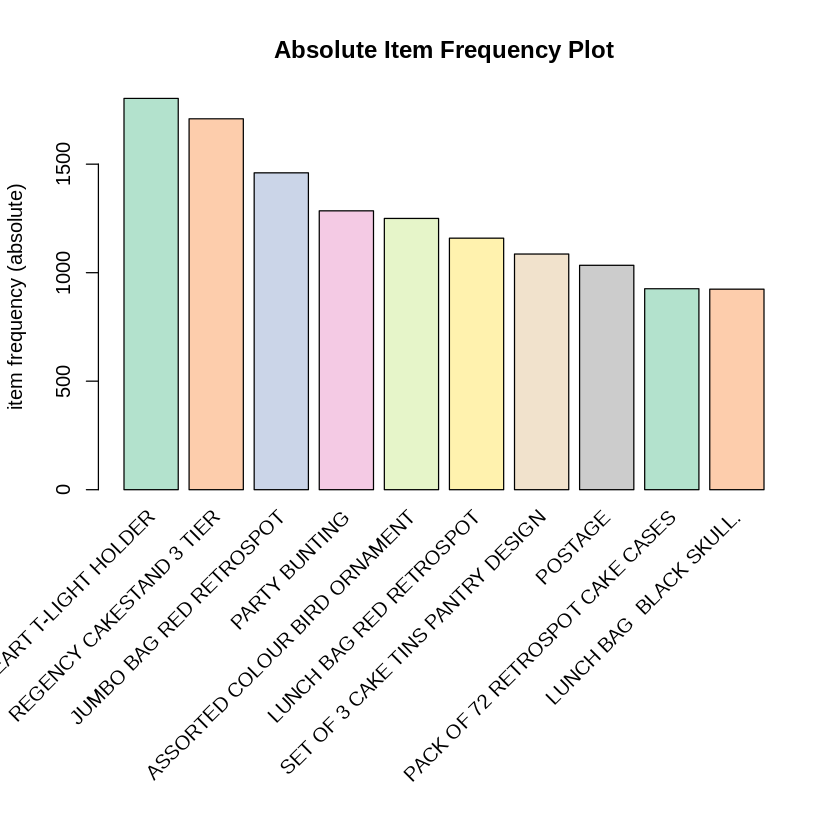

In [ ]:
# Create an item frequency plot for the top 20 items
if (!require("RColorBrewer")) {
  # install color package of R
install.packages("RColorBrewer")
#include library RColorBrewer
library(RColorBrewer)
}
itemFrequencyPlot(tr,topN=10,type="absolute",col=brewer.pal(8,'Pastel2'), main="Absolute Item Frequency Plot")

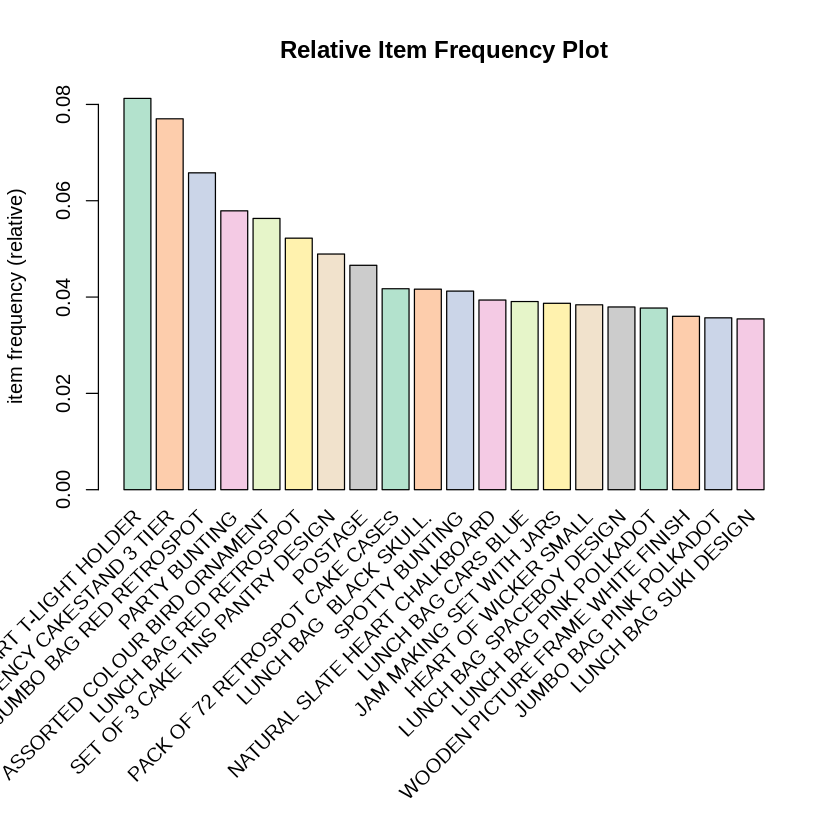

In [ ]:
itemFrequencyPlot(tr,topN=20,type="relative",col=brewer.pal(8,'Pastel2'),main="Relative Item Frequency Plot")


This plot shows that 'WHITE HANGING HEART T-LIGHT HOLDER' and 'REGENCY CAKESTAND 3 TIER' have the most sales.

So to increase the sale of 'SET OF 3 CAKE TINS PANTRY DESIGN' the retailer can put it near 'REGENCY CAKESTAND 3 TIER'.

### Generating Rules


Next step is to mine the rules using the APRIORI algorithm. The function apriori() is from package arules.

In [ ]:
# Min Support as 0.001, confidence as 0.8.
association.rules <- apriori(tr, parameter = list(supp=0.001, conf=0.8,maxlen=10))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 22 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[7876 item(s), 22191 transaction(s)] done [0.14s].
sorting and recoding items ... [2324 item(s)] done [0.01s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 4 5 6 7 8 9 10

Warning message in apriori(tr, parameter = list(supp = 0.001, conf = 0.8, maxlen = 10)):
“Mining stopped (maxlen reached). Only patterns up to a length of 10 returned!”


 done [0.37s].
writing ... [49122 rule(s)] done [0.04s].
creating S4 object  ... done [0.02s].


The apriori will take tr as the transaction object on which mining is to be applied. parameter will allow you to set min_sup and min_confidence.

 The default values for parameter are minimum support of 0.1, the minimum confidence of 0.8, maximum of 10 items (maxlen).

In [ ]:
summary(association.rules)

set of 49122 rules

rule length distribution (lhs + rhs):sizes
    2     3     4     5     6     7     8     9    10 
  105  2111  6854 16424 14855  6102  1937   613   121 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   5.000   5.000   5.499   6.000  10.000 

summary of quality measures:
    support           confidence        coverage             lift        
 Min.   :0.001036   Min.   :0.8000   Min.   :0.001036   Min.   :  9.846  
 1st Qu.:0.001082   1st Qu.:0.8333   1st Qu.:0.001262   1st Qu.: 22.237  
 Median :0.001262   Median :0.8788   Median :0.001442   Median : 28.760  
 Mean   :0.001417   Mean   :0.8849   Mean   :0.001609   Mean   : 64.589  
 3rd Qu.:0.001532   3rd Qu.:0.9259   3rd Qu.:0.001712   3rd Qu.: 69.200  
 Max.   :0.015997   Max.   :1.0000   Max.   :0.019107   Max.   :715.839  
     count       
 Min.   : 23.00  
 1st Qu.: 24.00  
 Median : 28.00  
 Mean   : 31.45  
 3rd Qu.: 34.00  
 Max.   :355.00  

mining info:
 data ntransactions support confidence
 

* Parameter Specification: min_sup=0.001 and min_confidence=0.8 values with 10 items as max of items in a rule.

* Total number of rules: The set of 49122 rules

* Distribution of rule length: A length of 5 items has the most rules: 16424 and length of 2 items have the lowest number of rules:105

* Summary of Quality measures: Min and max values for Support, Confidence and, Lift.

* Information used for creating rules: The data, support, and confidence we provided to the algorithm.

In [ ]:
# Inspecting the first 15 rules

inspect(association.rules[1:100])


      lhs                                     rhs                                      support confidence    coverage      lift count
[1]   {WOBBLY CHICKEN}                     => {DECORATION}                         0.001261773  1.0000000 0.001261773 443.82000    28
[2]   {WOBBLY CHICKEN}                     => {METAL}                              0.001261773  1.0000000 0.001261773 443.82000    28
[3]   {DECOUPAGE}                          => {GREETING CARD}                      0.001036456  1.0000000 0.001036456 389.31579    23
[4]   {BILLBOARD FONTS DESIGN}             => {WRAP}                               0.001306836  1.0000000 0.001306836 715.83871    29
[5]   {WRAP}                               => {BILLBOARD FONTS DESIGN}             0.001306836  0.9354839 0.001396963 715.83871    29
[6]   {ENAMEL PINK TEA CONTAINER}          => {ENAMEL PINK COFFEE CONTAINER}       0.001396963  0.8157895 0.001712406 385.17413    31
[7]   {WOBBLY RABBIT}                      => {DECORATION}    

Limiting the number and size of rules and


 If you want stronger rules, you can increase the value of conf and for more extended rules give higher value to maxlen.

In [ ]:
shorter.association.rules <- apriori(tr, parameter = list(supp=0.001, conf=0.8,maxlen=3))


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
      3  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 22 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[7876 item(s), 22191 transaction(s)] done [0.14s].
sorting and recoding items ... [2324 item(s)] done [0.01s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3

Warning message in apriori(tr, parameter = list(supp = 0.001, conf = 0.8, maxlen = 3)):
“Mining stopped (maxlen reached). Only patterns up to a length of 3 returned!”


 done [0.19s].
writing ... [2216 rule(s)] done [0.02s].
creating S4 object  ... done [0.01s].


Removing redundant rules


You can remove rules that are subsets of larger rules. Use the code below to remove such rules:



In [ ]:
subset.rules <- which(colSums(is.subset(association.rules, association.rules)) > 1) # get subset rules in vector
length(subset.rules)

[1] 44014

In [ ]:
# Remove subset rules
subset.association.rules. <- association.rules[-subset.rules] # remove subset rules.


which() returns the position of elements in the vector for which value is TRUE.

colSums() forms a row and column sums for dataframes and numeric arrays.

is.subset() Determines if elements of one vector contain all the elements of other

### Finding Rules related to given items

you want to work on a specific product. If you want to find out what causes influence on the purchase of item X you can use appearance option in the apriori command. appearance gives us options to set LHS (IF part) and RHS (THEN part) of the rule.

In [ ]:

# Finding out what the customer bought before buying the item METAL
metal.association.rules <- apriori(tr, parameter = list(supp=0.001, conf=0.8),appearance = list(default="lhs",rhs="METAL"))


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 22 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[7876 item(s), 22191 transaction(s)] done [0.15s].
sorting and recoding items ... [2324 item(s)] done [0.01s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 4 5 6 7 8 9 10

Warning message in apriori(tr, parameter = list(supp = 0.001, conf = 0.8), appearance = list(default = "lhs", :
“Mining stopped (maxlen reached). Only patterns up to a length of 10 returned!”


 done [0.46s].
writing ... [5 rule(s)] done [0.06s].
creating S4 object  ... done [0.01s].


In [ ]:
# Here lhs=METAL because you want to find out the probability of that in how many customers buy METAL along with other items
inspect(head(metal.association.rules))

    lhs                             rhs     support     confidence coverage   
[1] {WOBBLY CHICKEN}             => {METAL} 0.001261773 1          0.001261773
[2] {WOBBLY RABBIT}              => {METAL} 0.001532153 1          0.001532153
[3] {DECORATION}                 => {METAL} 0.002253166 1          0.002253166
[4] {DECORATION, WOBBLY CHICKEN} => {METAL} 0.001261773 1          0.001261773
[5] {DECORATION, WOBBLY RABBIT}  => {METAL} 0.001532153 1          0.001532153
    lift   count
[1] 443.82 28   
[2] 443.82 34   
[3] 443.82 50   
[4] 443.82 28   
[5] 443.82 34   


In [ ]:
# Check what customer  who bought METAL what else did they buy?

HERB_MARKER_CHIVES.association.rules <- apriori(tr, parameter = list(supp=0.001, conf=0.8),appearance = list(lhs="HERB MARKER CHIVES",default="rhs"))



Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 22 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[7876 item(s), 22191 transaction(s)] done [0.14s].
sorting and recoding items ... [2324 item(s)] done [0.01s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 done [0.01s].
writing ... [5 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [ ]:
# Here lhs=METAL because you want to find out the probability of that in how many customers buy METAL along with other items
inspect(head(HERB_MARKER_CHIVES.association.rules))

    lhs                     rhs                    support     confidence
[1] {HERB MARKER CHIVES} => {HERB MARKER BASIL}    0.005768104 0.8767123 
[2] {HERB MARKER CHIVES} => {HERB MARKER THYME}    0.006083547 0.9246575 
[3] {HERB MARKER CHIVES} => {HERB MARKER PARSLEY}  0.006038484 0.9178082 
[4] {HERB MARKER CHIVES} => {HERB MARKER ROSEMARY} 0.006128611 0.9315068 
[5] {HERB MARKER CHIVES} => {HERB MARKER MINT}     0.006038484 0.9178082 
    coverage    lift     count
[1] 0.006579244 116.4977 128  
[2] 0.006579244 125.1163 135  
[3] 0.006579244 124.9514 134  
[4] 0.006579244 122.3140 136  
[5] 0.006579244 119.1057 134  


Visualizing Association Rules

Scatter plot

rulesObject: the rules object to be plotted

measure: Measures for rule interestingness. Can be Support, Confidence, lift or combination of these depending upon method value.

shading: Measure used to color points (Support, Confidence, lift). The default is Lift.

method: Visualization method to be used (scatterplot, two-key plot, matrix3D).

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



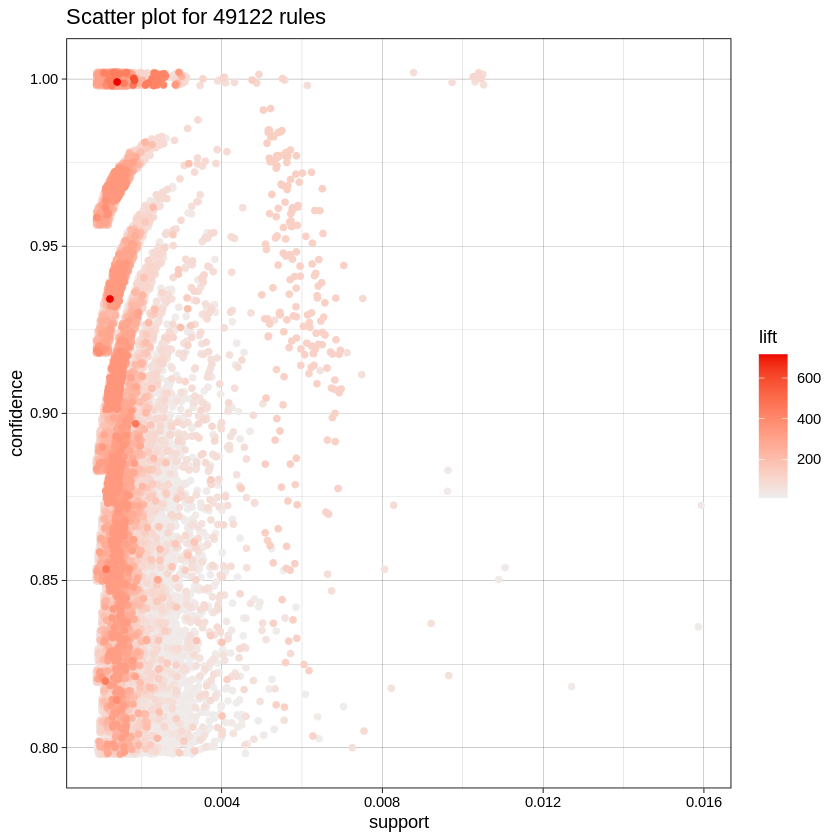

In [ ]:
# It uses Support and Confidence on the axes. In addition, third measure Lift is used by default to color (grey levels) of the points.

# Filter rules with confidence greater than 0.4 or 40%
subRules<-association.rules[quality(association.rules)$confidence>0.4]
#Plot SubRules
plot(subRules)

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



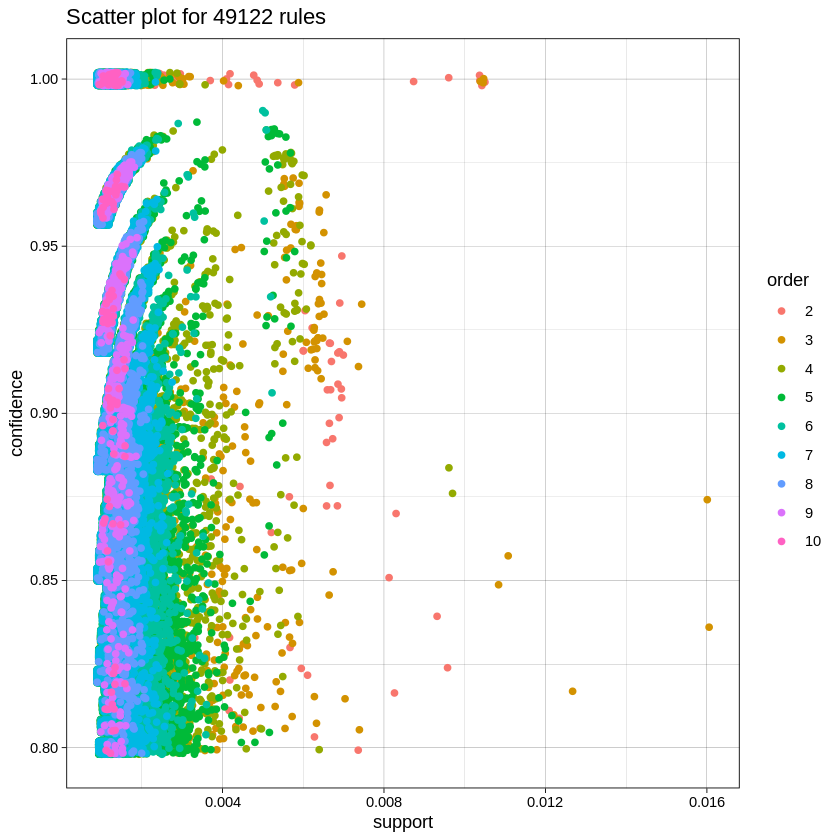

In [ ]:
plot(subRules,method="two-key plot")


Warning message in plot.rules(subRules, method = "matrix3D"):
“method 'matrix3D' is deprecated use method 'matrix' with engine '3d'”
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



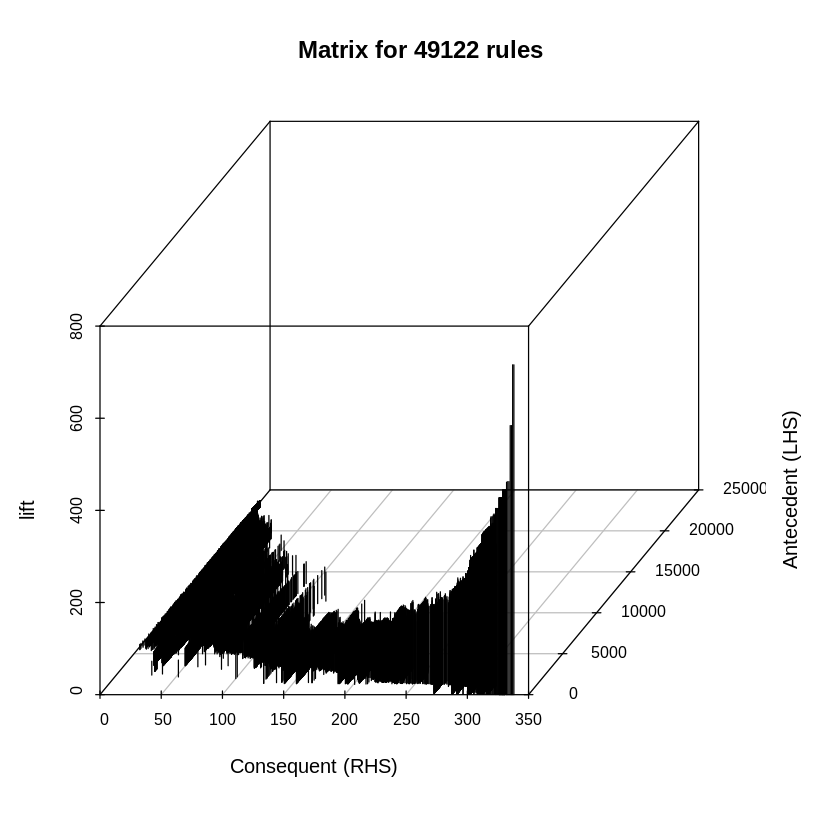

In [ ]:
plot(subRules,method="matrix3D")


In [ ]:
install.packages("plotly_arules")

In [ ]:
library(plotly_arules)

In [ ]:
plotly_arules(subRules)


In [ ]:


top10subRules <- head(subRules, n = 10, by = "confidence")

plot(top10subRules, method = "graph",  engine = "htmlwidget")


HTML widgets cannot be represented in plain text (need html)

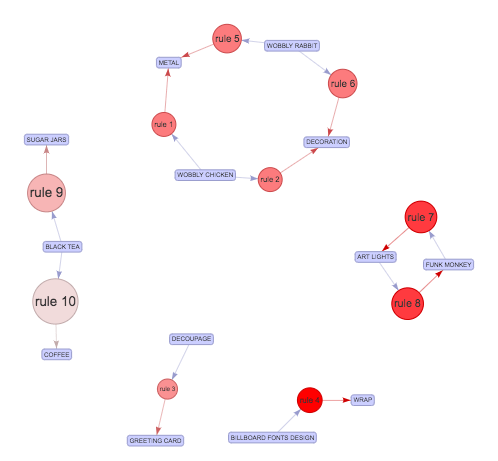

### Individual Rule Representation


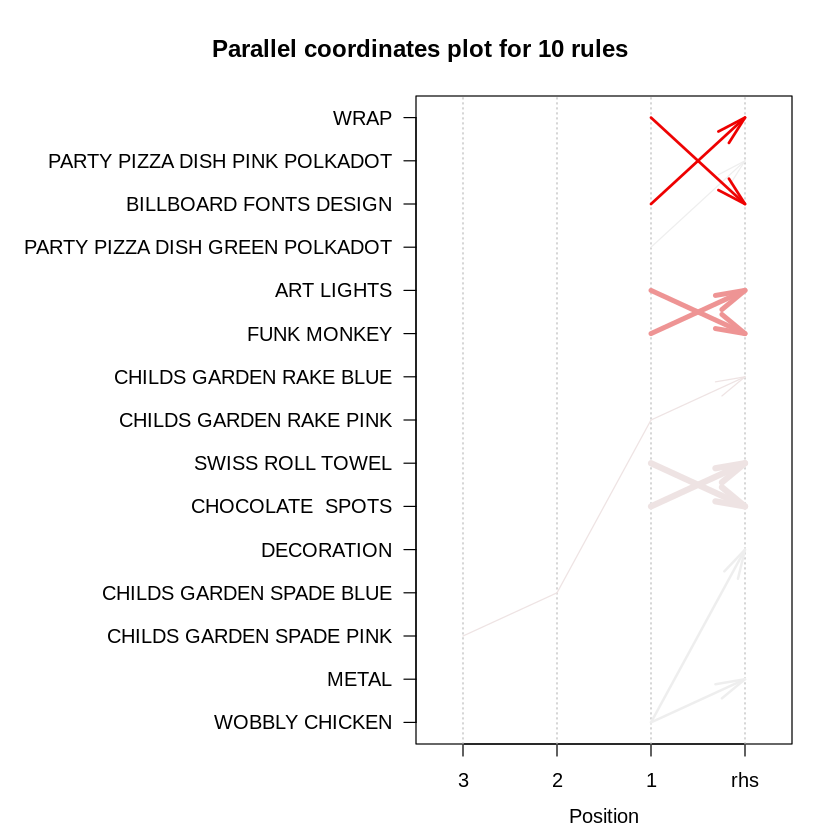

In [ ]:
# Filter top 20 rules with highest lift
subRules2<-head(subRules, n=10, by="lift")
plot(subRules2, method="paracoord")

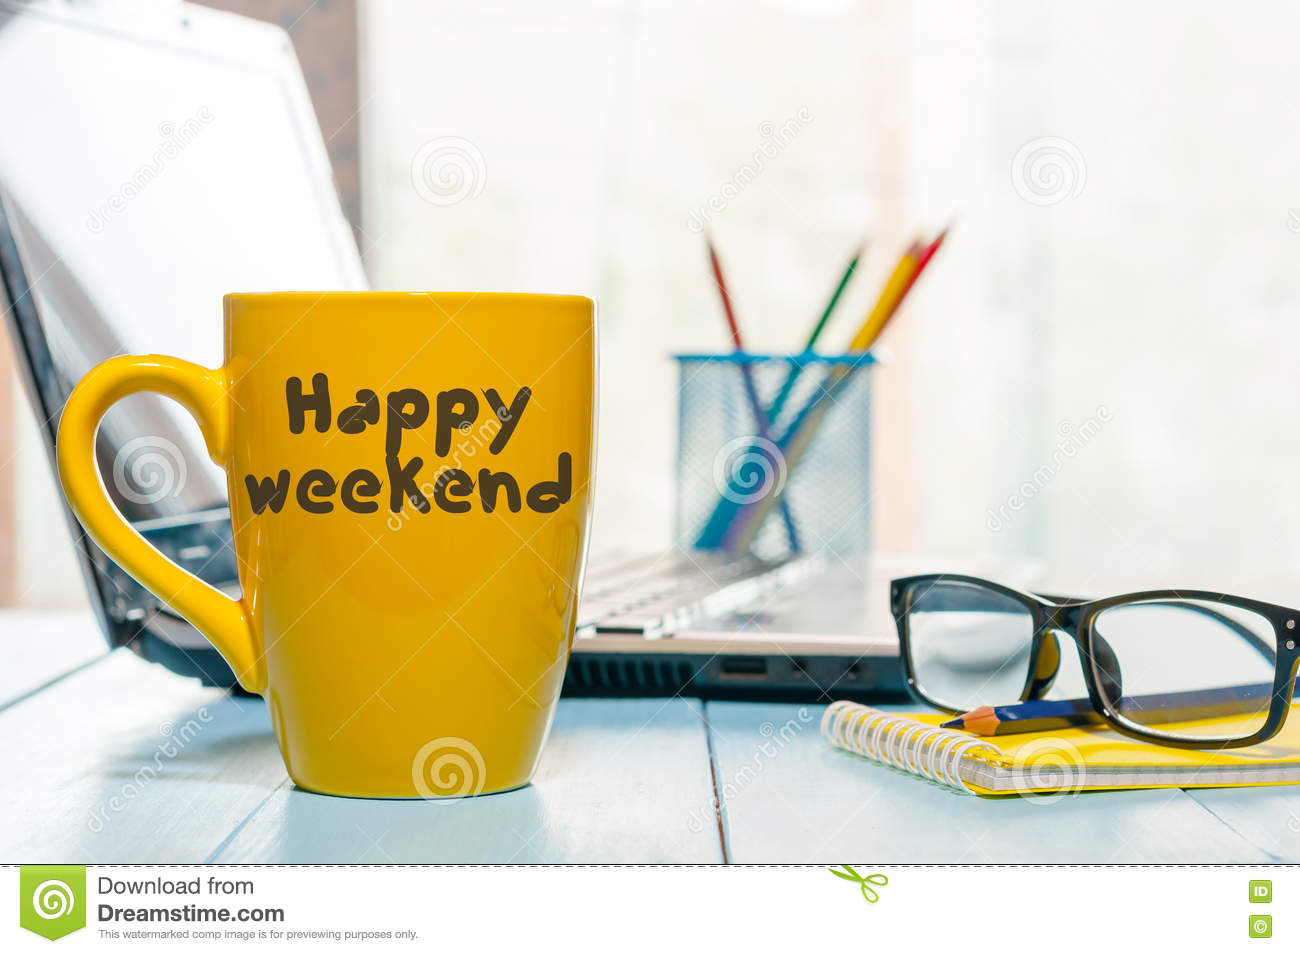